In [2]:
from zipfile import ZipFile
import os

def extract_zip(zip_path: str) -> None:
    try:
        with ZipFile(zip_path, "r") as zf:
            zf.extractall()
    except:
        print(f"Error in extracting zip file at {zip_file}!")
        
curr_dir = os.path.abspath('')
zipfile = "Telco-Customer-Churn.zip"
zip_path = os.path.join(curr_dir,zipfile)

In [4]:
extract_zip(zip_path)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [49]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [51]:
churn = df.iloc[:,-1]
churn_counts = churn.value_counts()
churn_counts

No     5174
Yes    1869
Name: Churn, dtype: int64

In [52]:
print(f"Percentage churned: {round(churn[churn == 1].sum()/churn.count()*100,1)}%")

Percentage churned: 0.0%


In [53]:
df["customerID"].is_unique

True

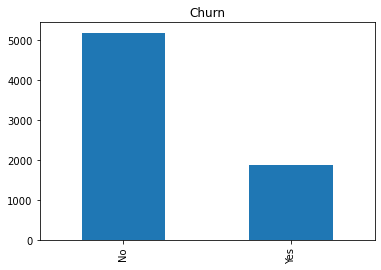

In [214]:
churn_counts.plot(kind='bar',title="Churn");#,autopct="%.1f%%"

In [20]:
# Replace target values with numeric ones
mapping_dict = {'No': 0, 'Yes': 1}
y.replace(mapping_dict,inplace=True)

In [22]:
y.isnull().sum()

0

In [64]:
df[df['Churn']=='Yes']["MultipleLines"].value_counts()

Yes                 850
No                  849
No phone service    170
Name: MultipleLines, dtype: int64

In [65]:
df[df['Churn']=='No']["MultipleLines"].value_counts()

No                  2541
Yes                 2121
No phone service     512
Name: MultipleLines, dtype: int64

In [75]:
df["TotalCharges"] = df["TotalCharges"].replace(" ",0)
df["TotalCharges"] = df["TotalCharges"].astype("float")
df["TotalCharges"]

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [89]:
df_bar = df.groupby("MultipleLines")["Churn"].value_counts().to_frame()

In [100]:
df_bar = df_bar.rename({"Churn":"Percentage"},axis=1)
df_bar["Percentage"] = df_bar["Percentage"]/df_bar["Percentage"].sum() * 100
df_bar = df_bar.reset_index()
df_bar

,MultipleLines,Churn,Percentage
0,No,No,36.078376
1,No,Yes,12.054522
2,No phone service,No,7.269629
3,No phone service,Yes,2.413744
4,Yes,No,30.115008
5,Yes,Yes,12.068721


In [103]:
def create_barplot(column):
    df_plot = df.groupby(column)["Churn"].value_counts().to_frame()
    new_col_name = "Percentage"
    df_plot = df_plot.rename({"Churn":new_col_name},axis=1)
    df_plot[new_col_name] = df_plot[new_col_name]/df_plot[new_col_name].sum() * 100
    df_plot = df_plot.reset_index()
    
    sns.barplot(x=column, y=new_col_name, data = df_plot, hue = "Churn")

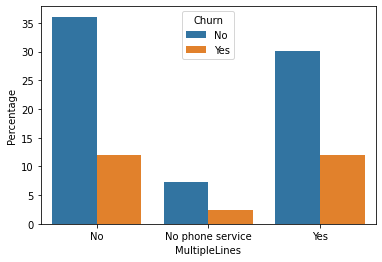

In [104]:
create_barplot("MultipleLines")

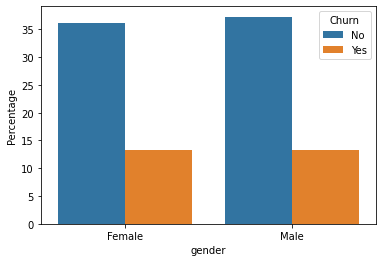

In [106]:
create_barplot("gender")

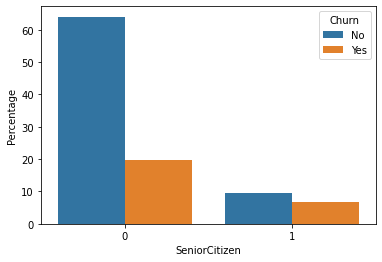

In [107]:
create_barplot("SeniorCitizen")

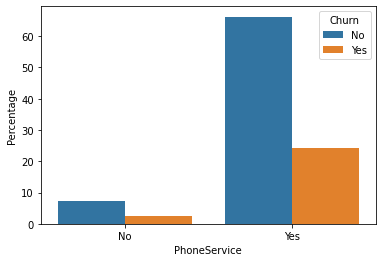

In [108]:
create_barplot("PhoneService")

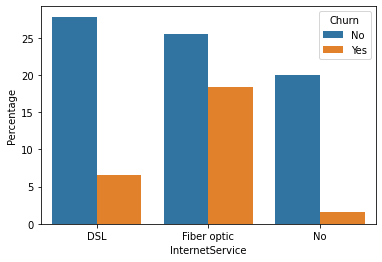

In [109]:
create_barplot("InternetService")

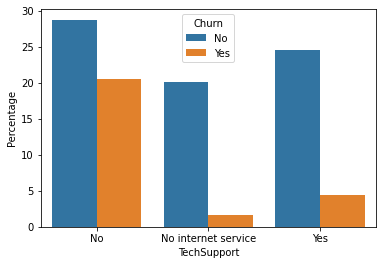

In [110]:
create_barplot("TechSupport")

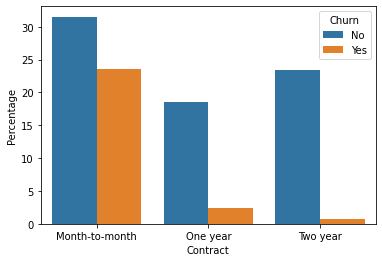

In [111]:
create_barplot("Contract")

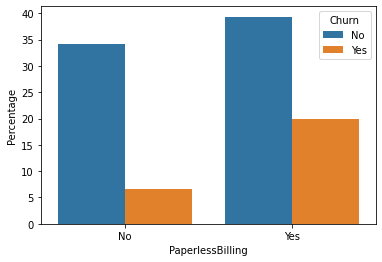

In [112]:
create_barplot("PaperlessBilling")

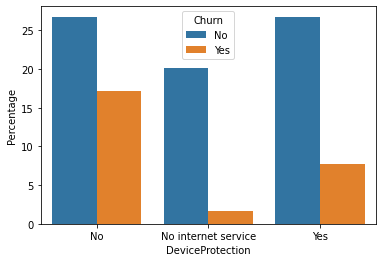

In [113]:
create_barplot("DeviceProtection")

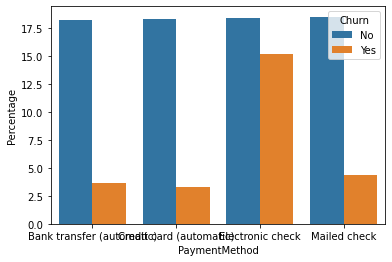

In [129]:
create_barplot("PaymentMethod")

In [130]:
df["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [131]:
df.replace({"PaymentMethod": {'Electronic check': 'EC', 'Mailed check': 'MC', 'Bank transfer (automatic)': 'BT', 'Credit card (automatic)': 'CC'}},inplace=True)

In [132]:
df["PaymentMethod"].unique()

array(['EC', 'MC', 'BT', 'CC'], dtype=object)

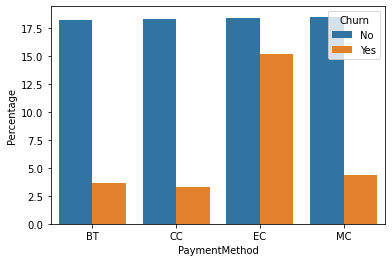

In [133]:
create_barplot("PaymentMethod")

In [127]:
def create_kdeplot(column):
    yes = df[df["Churn"]=='Yes'][column]
    no = df[df["Churn"]=='No'][column]
    fig, ax = plt.subplots()
    sns.kdeplot(yes,color='blue',label='Yes')
    sns.kdeplot(no,color='red',label='No')
    plt.title(f"Churn for {column}")
    plt.xlabel(f"{column}")
    plt.ylabel("KDE")

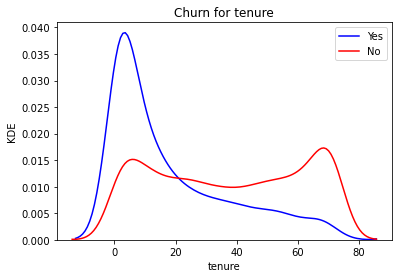

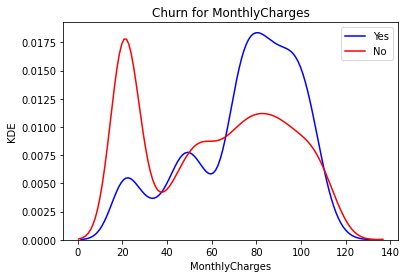

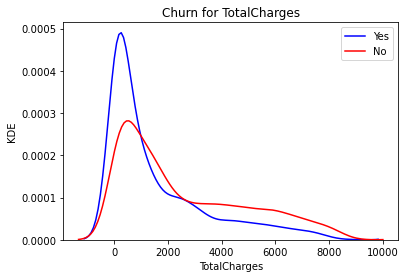

In [128]:
create_kdeplot("tenure")
create_kdeplot("MonthlyCharges")
create_kdeplot("TotalCharges")

# Insights:
Shorter tenure and higher monthly charges are associated with increased churn likelihood

In [138]:
factorized = df.apply(lambda x: pd.factorize(x)[0])

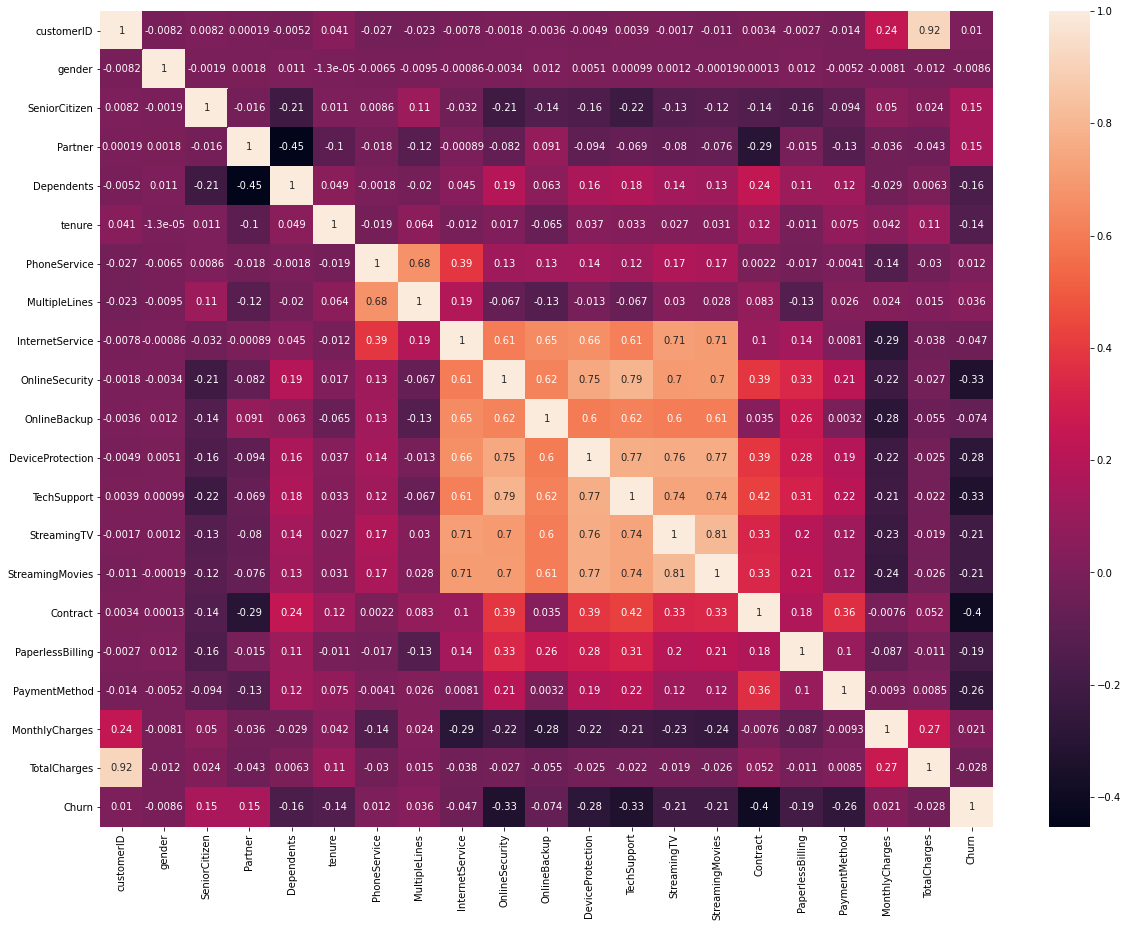

In [144]:
correlations = factorized.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlations,annot=True);

In [145]:
df_dropped = df.drop(["customerID","gender","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"],axis=1)

In [146]:
df_dropped.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,DSL,Month-to-month,Yes,EC,29.85,29.85,No
1,0,No,No,34,Yes,DSL,One year,No,MC,56.95,1889.50,No
2,0,No,No,2,Yes,DSL,Month-to-month,Yes,MC,53.85,108.15,Yes
3,0,No,No,45,No,DSL,One year,No,BT,42.30,1840.75,No
4,0,No,No,2,Yes,Fiber optic,Month-to-month,Yes,EC,70.70,151.65,Yes


In [147]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   object 
 2   Dependents        7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   object 
 5   InternetService   7043 non-null   object 
 6   Contract          7043 non-null   object 
 7   PaperlessBilling  7043 non-null   object 
 8   PaymentMethod     7043 non-null   object 
 9   MonthlyCharges    7043 non-null   float64
 10  TotalCharges      7043 non-null   float64
 11  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 660.4+ KB


In [148]:
df_dropped.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [154]:
numerical_columns = ["tenure","MonthlyCharges","TotalCharges"]
categorical_columns = df_dropped.columns[~df_dropped.columns.isin(numerical_columns)]

In [155]:
categorical_columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'InternetService', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')

In [159]:
df_cats = df_dropped[categorical_columns].copy()

In [160]:
for col in df_cats.columns:
    if df_cats[col].nunique() == 2:
        df_cats[col] = pd.factorize(df_cats[col])[0]
    else:
        df_cats = pd.get_dummies(df_cats, columns=[col], drop_first=True)

In [165]:
df_cats.head()

,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_CC,PaymentMethod_EC,PaymentMethod_MC
0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,1,1,0,0,0,1,0,0,0,1
2,0,1,0,1,0,1,0,0,0,0,0,0,1
3,0,1,0,0,1,0,0,0,1,0,0,0,0
4,0,1,0,1,0,1,1,0,0,0,0,1,0


In [163]:
df_num = df_dropped[numerical_columns].copy()

In [164]:
df_num.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [166]:
df_tot = pd.merge(df_num,df_cats,left_index=True,right_index=True)

In [167]:
df_tot.head()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_CC,PaymentMethod_EC,PaymentMethod_MC
0,1,29.85,29.85,0,0,0,0,0,0,0,0,0,0,0,1,0
1,34,56.95,1889.50,0,1,0,1,1,0,0,0,1,0,0,0,1
2,2,53.85,108.15,0,1,0,1,0,1,0,0,0,0,0,0,1
3,45,42.30,1840.75,0,1,0,0,1,0,0,0,1,0,0,0,0
4,2,70.70,151.65,0,1,0,1,0,1,1,0,0,0,0,1,0


In [168]:
df_tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   tenure                       7043 non-null   int64  
 1   MonthlyCharges               7043 non-null   float64
 2   TotalCharges                 7043 non-null   float64
 3   SeniorCitizen                7043 non-null   int64  
 4   Partner                      7043 non-null   int64  
 5   Dependents                   7043 non-null   int64  
 6   PhoneService                 7043 non-null   int64  
 7   PaperlessBilling             7043 non-null   int64  
 8   Churn                        7043 non-null   int64  
 9   InternetService_Fiber optic  7043 non-null   uint8  
 10  InternetService_No           7043 non-null   uint8  
 11  Contract_One year            7043 non-null   uint8  
 12  Contract_Two year            7043 non-null   uint8  
 13  PaymentMethod_CC  

In [169]:
X = df_tot.drop(["Churn"],axis=1).copy()
y = df_tot["Churn"].copy()

In [170]:
X

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_CC,PaymentMethod_EC,PaymentMethod_MC
0,1,29.85,29.85,0,0,0,0,0,0,0,0,0,0,1,0
1,34,56.95,1889.50,0,1,0,1,1,0,0,1,0,0,0,1
2,2,53.85,108.15,0,1,0,1,0,0,0,0,0,0,0,1
3,45,42.30,1840.75,0,1,0,0,1,0,0,1,0,0,0,0
4,2,70.70,151.65,0,1,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,0,0,1,1,0,0,0,1,0,0,0,1
7039,72,103.20,7362.90,0,0,1,1,0,1,0,1,0,1,0,0
7040,11,29.60,346.45,0,0,1,0,0,0,0,0,0,0,1,0
7041,4,74.40,306.60,1,0,0,1,0,1,0,0,0,0,0,1


In [171]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [172]:
from sklearn.ensemble import RandomForestClassifier

In [175]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X,y)

RandomForestClassifier(n_estimators=500)

In [176]:
rf.feature_importances_

array([0.20775808, 0.24585444, 0.26126019, 0.01944601, 0.02188666,
       0.01861868, 0.00791234, 0.02572107, 0.04801357, 0.01802967,
       0.02534573, 0.03792487, 0.01241808, 0.03752521, 0.01228541])

In [177]:
df_fi = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})

In [178]:
df_fi

,feature,importance
0,tenure,0.207758
1,MonthlyCharges,0.245854
2,TotalCharges,0.261260
3,SeniorCitizen,0.019446
4,Partner,0.021887
5,Dependents,0.018619
6,PhoneService,0.007912
7,PaperlessBilling,0.025721
8,InternetService_Fiber optic,0.048014
9,InternetService_No,0.018030


In [181]:
df_fi.sort_values(by=["importance"],ascending=False,inplace=True)

In [182]:
df_fi

,feature,importance
2,TotalCharges,0.261260
1,MonthlyCharges,0.245854
0,tenure,0.207758
8,InternetService_Fiber optic,0.048014
11,Contract_Two year,0.037925
13,PaymentMethod_EC,0.037525
7,PaperlessBilling,0.025721
10,Contract_One year,0.025346
4,Partner,0.021887
3,SeniorCitizen,0.019446


In [183]:
from sklearn.feature_selection import SelectFromModel

In [184]:
sm = SelectFromModel(rf,threshold=0.02,prefit=True)

In [187]:
X.columns[sm.get_support()]

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Partner',
       'PaperlessBilling', 'InternetService_Fiber optic', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_EC'],
      dtype='object')

In [188]:
df_fi_select = pd.DataFrame({'feature': X.columns[sm.get_support()], 'importance': rf.feature_importances_[sm.get_support()]})

In [189]:
df_fi_select.sort_values(by=["importance"],ascending=False,inplace=True)

In [192]:
df_fi_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 2 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature     9 non-null      object 
 1   importance  9 non-null      float64
dtypes: float64(1), object(1)
memory usage: 536.0+ bytes


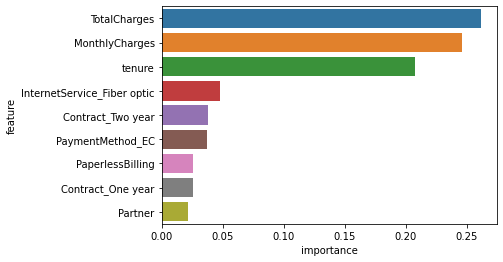

In [202]:
sns.barplot(x="importance",y="feature",data=df_fi_select);

In [203]:
X.columns[sm.get_support()]

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Partner',
       'PaperlessBilling', 'InternetService_Fiber optic', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_EC'],
      dtype='object')

In [210]:
df_save = df_tot[['Churn','tenure', 'MonthlyCharges', 'TotalCharges', 'Partner',
       'PaperlessBilling', 'InternetService_Fiber optic', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_EC']].copy()

In [212]:
df_save.to_csv('telco_data_processed.csv',index=False)